# Gold Price Pridiction with Random Forest Regresser

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#data set from kaggle
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.sample(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
288,5/4/2009,907.239990,88.639999,30.559999,12.830,1.331593
113,7/8/2008,1273.699951,90.860001,109.919998,17.664,1.573589
2102,7/13/2017,2447.830078,115.820000,9.470000,14.870,1.140394
1758,12/23/2015,2064.290039,102.309998,11.260000,13.620,1.095002
2163,10/31/2017,2575.260010,120.669998,10.930000,15.790,1.165270


In [5]:
gold_data.shape

(2290, 6)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Model building
# 4. Evaluation

## 1.  Data Cleaning

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values in  each column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# There is no null attributes or no waste column so there is no need to remove aany column

## 2. EDA

In [10]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# Now calculating Correlation
#Correlation is a statistical concept that measures the relationship between two or more variables. 
#It indicates how strongly the variables are related to each other, and in what direction.

In [12]:
correlation  = gold_data.corr(numeric_only=True)

In [13]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

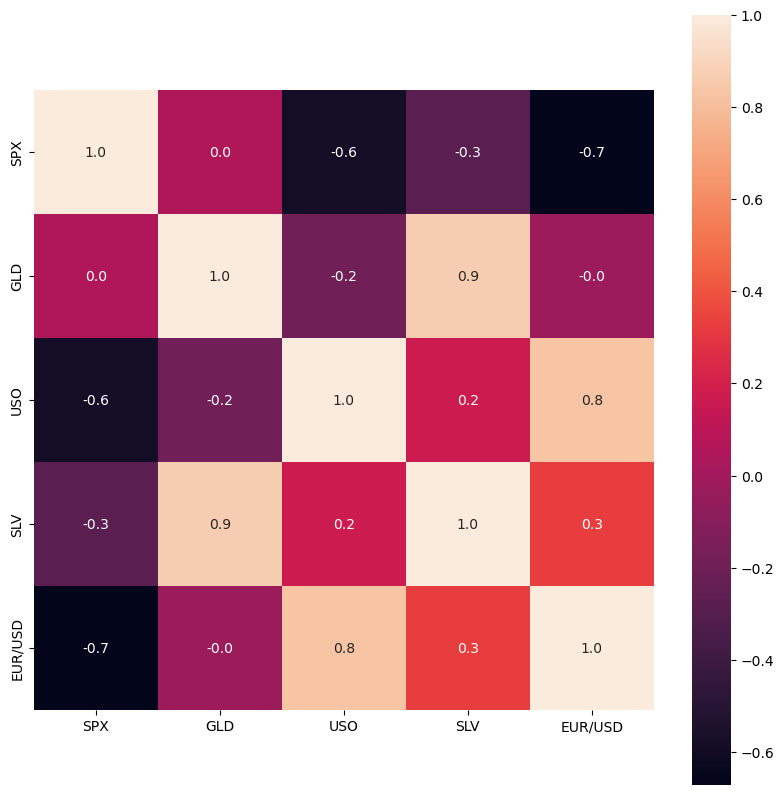

In [14]:
# constructing a heatmap 
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10})

In [15]:
# calculating correlation value of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


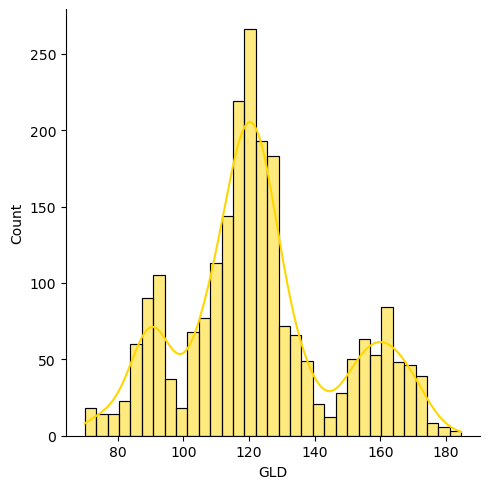

In [86]:
# checking the distribution of the GLD Price
sns.displot(data=gold_data, x='GLD', color='gold', kde=True)

## 3. Model Building

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [19]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [20]:
# splitting the dataset as 20% of the data will be reserved for testing, and the remaining 80% will be used for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [26]:
knr  = KNeighborsRegressor()
tr = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(n_estimators=100)
lr = LinearRegression()

In [53]:
models = {
    'KNeighborsRegressor': knr,
    'DecisionTreeRegressor': tr,
    'RandomForestRegressor': rf,
    'LinearRegression': lr,
}

In [74]:
# calculating Mean Squared error:The formula for MSE is as follows:
#MSE = Σ(yᵢ - ŷᵢ)² / n


# R squared error: The formula for R-squared is as follows:
#R² = 1 - (Σ(yᵢ - ŷᵢ)² / Σ(yᵢ - ȳ)²)


In [54]:
def train_regressior(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    R_error = metrics.r2_score(Y_test, y_pred)
    
    return mse, R_error

In [55]:
train_regressior(rf,X_train,Y_train,X_test,Y_test)

(5.358405042778278, 0.9898407980454054)

In [56]:
mse_scores = []
R_error_scores = []

for name, model in models.items():
    
    current_mse, current_R_error = train_regressior(model, X_train, Y_train, X_test, Y_test)
    
    print("For ", name)
    print("MSE - ", current_mse)
    print("R Square Error - ", current_R_error)
    
    mse_scores.append(current_mse)
    R_error_scores.append(current_R_error)

For  KNeighborsRegressor
MSE -  34.86469067219383
R Square Error -  0.9338987197131254
For  DecisionTreeRegressor
MSE -  26.93414750926862
R Square Error -  0.9489345352139286
For  RandomForestRegressor
MSE -  5.520805707555888
R Square Error -  0.9895328965079395
For  LinearRegression
MSE -  70.78890079721532
R Square Error -  0.8657886565869237


In [57]:
#mse ~ 0 is best and r_quare ~1 is best

In [59]:
# Create a DataFrame using the dictionary keys (model names)
performance_df = pd.DataFrame({'Algorithm': models.keys(), 'MSE': mse_scores, 'R Square Error': R_error_scores})

# Sort the DataFrame by R Square Error in descending order
performance_df = performance_df.sort_values('R Square Error', ascending=False)
performance_df

,Algorithm,MSE,R Square Error
2,RandomForestRegressor,5.520806,0.989533
1,DecisionTreeRegressor,26.934148,0.948935
0,KNeighborsRegressor,34.864691,0.933899
3,LinearRegression,70.788901,0.865789


In [64]:
# from the above we get the random forest tree is the best algorithm for this problem

In [75]:
# using Random forest Regressor algorithm
Rf = RandomForestRegressor(n_estimators=100)

In [76]:
# Model training
Rf.fit(X_train,Y_train)

RandomForestRegressor()

In [77]:
y_pred = Rf.predict(X_test)

In [78]:
y_pred

array([168.78640024,  81.79190001, 115.97560014, 127.7547007 ,
       120.63610108, 154.79279814, 150.50339828, 126.06090064,
       117.67459881, 126.01780049, 116.75730082, 171.67980087,
       141.67149879, 167.77639825, 115.22229999, 117.58680059,
       138.87450256, 170.04610114, 159.32150249, 158.76270007,
       155.12920041, 125.22499984, 176.0136991 , 157.17370349,
       125.19650059,  93.95499972,  77.77519995, 120.40309981,
       119.10379949, 167.54799985,  87.96940057, 124.90319982,
        91.11990059, 117.65470048, 121.01009903, 136.91300054,
       115.56960072, 115.23860074, 148.4532001 , 106.98970087,
       104.15140248,  87.3833979 , 126.63730046, 118.0749999 ,
       152.7005986 , 119.50900011, 108.39400014, 108.21519825,
        93.17470046, 127.10789789,  74.67630036, 113.72219921,
       121.31149984, 111.17369902, 118.75589907, 120.43319956,
       159.82739982, 165.86710139, 147.13189648,  85.93179881,
        94.54770032,  86.75039867,  90.6651003 , 118.83

## 4. Evaluation

In [79]:
#Compare the Actual Values and Predicted Values in a Plot

In [80]:
Y_test = list(Y_test)

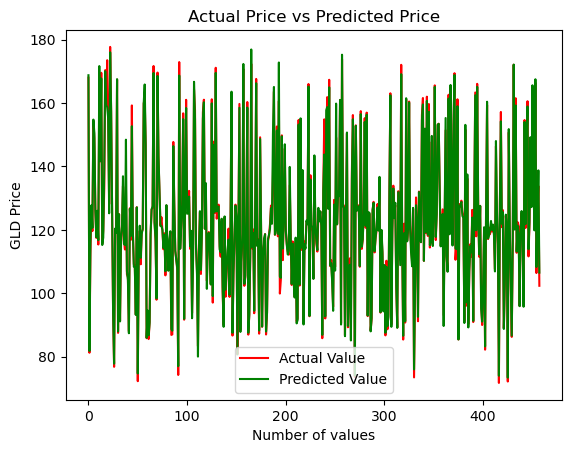

In [81]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [82]:
import pickle
pickle.dump(Rf,open('model.pkl','wb'))